<a href="https://colab.research.google.com/github/ousidus/fake_news_detection/blob/main/fake_news_detection_gpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

data = pd.read_csv('/content/news.csv')

max_sequence_length = 128

tokenizer = GPT2Tokenizer.from_pretrained('gpt2', pad_token='<pad>')

train_inputs_text = []
test_inputs_text = []

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

for _, data_row in train_data.iterrows():
    text = data_row['title'] + '. ' + data_row['text']
    text_tokens = tokenizer.encode(text, max_length=max_sequence_length, truncation=True, padding='max_length')
    train_inputs_text.append(text_tokens)

for _, data_row in test_data.iterrows():
    text = data_row['title'] + '. ' + data_row['text']
    text_tokens = tokenizer.encode(text, max_length=max_sequence_length, truncation=True, padding='max_length')
    test_inputs_text.append(text_tokens)

label_encoder = LabelEncoder()
train_labels = torchtensor(label_encoder.fit_transform(train_data['label']))
test_labels = torch.tensor(label_encoder.transform(test_data['label']))
.
train_inputs_text = torch.tensor(train_inputs_text)
test_inputs_text = torch.tensor(test_inputs_text)

train_dataset = TensorDataset(train_inputs_text, train_labels)
test_dataset = TensorDataset(test_inputs_text, test_labels)

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classifier_model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=len(label_encoder.classes_))

optimizer = AdamW(classifier_model.parameters(), lr=1e-5)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier_model.to(device)

epochs = 5

for epoch in range(epochs):
    classifier_model.train()
    total_loss = 0

    for batch in train_dataloader:
        inputs_text, labels = batch
        inputs_text, labels = inputs_text.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = classifier_model(inputs_text, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {average_loss}')

classifier_model.eval()
true_labels = []
predicted_labels = []

for batch in test_dataloader:
    inputs_text, labels = batch
    inputs_text, labels = inputs_text.to(device), labels.to(device)

    with torch.no_grad():
        outputs = classifier_model(inputs_text)

    logits = outputs.logits
    _, predicted = torch.max(logits, 1)

    true_labels.extend(labels.cpu().numpy())
    predicted_labels.extend(predicted.cpu().numpy())

print(classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public

IndexError: index out of range in self

In [ ]:
if torch.max(train_inputs_text).item() >= tokenizer.vocab_size or torch.max(test_inputs_text).item() >= tokenizer.vocab_size:
    print("Token index out of range. Please check tokenization process.")
else:
    print("All token indices are within the expected range.")



Token index out of range. Please check tokenization process.


In [ ]:
print(f"Padding token index: {tokenizer.pad_token_id}")




Padding token index: 50257


In [ ]:
for epoch in range(epochs):
    classifier_model.train()
    total_loss = 0

    for batch in train_dataloader:
        inputs_text, labels = batch
        inputs_text, labels = inputs_text.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = classifier_model(inputs_text, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {average_loss}')

IndexError: index out of range in self

In [ ]:
!pip install --upgrade torch
!pip install --upgrade transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

data = pd.read_csv('news.csv')

train, test = train_test_split(data, test_size=0.2, random_state=42)

le = LabelEncoder()
le.fit(train['label'])
train['label'] = le.transform(train['label'])
test['label'] = le.transform(test['label'])

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

tokenizer.pad_token = tokenizer.eos_token

train_encodings = tokenizer(train['text'].tolist(), truncation=True, padding=True, max_length=1024)
test_encodings = tokenizer(test['text'].tolist(), truncation=True, padding=True, max_length=1024)

train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              torch.tensor(train['label'].tolist()))
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']),
                                torch.tensor(test_encodings['attention_mask']),
                                torch.tensor(test['label'].tolist()))


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)


model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=2)
model.train()


optim = AdamW(model.parameters(), lr=5e-5)


for epoch in range(3):
    for batch in train_loader:
        optim.zero_grad()
        input_ids = batch[0]
        attention_mask = batch[1]
        labels = batch[2]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optim.step()


model.eval()
y_pred = []
y_true = []
for batch in test_loader:
    with torch.no_grad():
        input_ids = batch[0]
        attention_mask = batch[1]
        labels = batch[2]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        y_pred.extend(torch.argmax(logits, dim=1).tolist())
        y_true.extend(labels.tolist())

print(classification_report(y_true, y_pred, target_names=le.classes_))
model.eval()
for batch in test_loader:
    with torch.no_grad():
        outputs = model(input_ids=batch[0], attention_mask=batch[1])
        logits = outputs[0]
        y_pred.extend(torch.argmax(logits, dim=1).tolist())
        y_true.extend(batch[2].tolist())

print(classification_report(y_true, y_pred, target_names=le.classes_))



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

data = pd.read_csv('news.csv')
max_sequence_length = 128
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', pad_token='<pad>')

train_inputs_text = []
test_inputs_text = []

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

for _, data_row in train_data.iterrows():
    text = data_row['title'] + '. ' + data_row['text']
    text_tokens = tokenizer.encode(text, max_length=max_sequence_length, truncation=True, padding='max_length')
    train_inputs_text.append(text_tokens)

for _, data_row in test_data.iterrows():
    text = data_row['title'] + '. ' + data_row['text']
    text_tokens = tokenizer.encode(text, max_length=max_sequence_length, truncation=True, padding='max_length')
    test_inputs_text.append(text_tokens)


train_inputs_text = torch.tensor(train_inputs_text)
test_inputs_text = torch.tensor(test_inputs_text)

label_encoder = LabelEncoder()
train_labels = torch.tensor(label_encoder.fit_transform(train_data['label']))
test_labels = torch.tensor(label_encoder.transform(test_data['label']))

train_dataset = TensorDataset(train_inputs_text, train_labels)
test_dataset = TensorDataset(test_inputs_text, test_labels)

batch_size = 16

train_dataloader = DataLoader(train_dataset, sampler=None, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=None, batch_size=batch_size)

model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=2)
model.cuda()

optimizer = AdamW(model.parameters(), lr=5e-5)

epochs = 3

for epoch in range(epochs):

    model.train()

    for batch in train_dataloader:
        batch = tuple(t.cuda() for t in batch)

        inputs = {'input_ids': batch[0], 'labels': batch[1]}
        outputs = model(**inputs)
        loss = outputs[0]

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    model.eval()

    predictions = []
    true_labels = []

    for batch in test_dataloader:
        batch = tuple(t.cuda() for t in batch)

        inputs = {'input_ids': batch[0], 'labels': batch[1]}
        outputs = model(**inputs)

        logits = outputs[1]
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()

        predictions.append(logits)
        true_labels.append(label_ids)

    predictions = [item for sublist in predictions for item in sublist]
    predictions = np.argmax(predictions, axis=1).flatten()
    true_labels = [item for sublist in true_labels for item in sublist]

    print(classification_report(true_labels, predictions))

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

data = pd.read_csv('news.csv')


train, remaining_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42, stratify=remaining_data['label'])



In [ ]:
print(train.title)

471     'America is already strong': Obama continues D...
4825    Podesta relative earned six-figure fees lobbyi...
6166    Bitcoin Soars As China Launches Crackdown On W...
4886      Nanny In Jail After Force Feeding Baby To Death
2646    Lavrov Schools European Diplomats in Logic Usi...
                              ...                        
90       Exclusive: GOP campaigns plot revolt against RNC
917           Who's winning Indiana? It's anybody's guess
1101    Three Ways to Recharge Your Energy Using Crystals
1845    Principal institutes ban after students wear C...
698     Michael Moore: Joe Blow Will Vote Trump As “Ul...
Name: title, Length: 5068, dtype: object


In [ ]:

le = LabelEncoder()
train_labels = le.fit_transform(train.label)
test_labels = le.transform(test.label)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

tokenizer.pad_token = tokenizer.eos_token

train_encodings = tokenizer(train.title.to_list(), truncation=True, padding=True)
test_encodings = tokenizer(test.title.to_list(), truncation=True, padding=True)

train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']), torch.tensor(train_labels))
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']), torch.tensor(test_labels))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=2)
model.config.pad_token_id = tokenizer.eos_token_id
device = torch.device('cuda')
model.to(device)

optim = AdamW(model.parameters(), lr=5e-5)
total_train_loss = 0;
for epoch in range(5):
    model.train()
    for batch in train_loader:
        optim.zero_grad()
        input_ids = batch[0].to(device)
        labels = batch[1].to(device)
        outputs = model(input_ids, labels=labels)
        loss = outputs[0]
        loss.backward()
        optim.step()
        total_train_loss += loss.item()
    avg_train_loss = total_train_loss / len(train_loader)
    print(f'Epoch: {epoch+1}, Loss:  {avg_train_loss}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW ins

Epoch: 1, Loss:  0.3911068974186193
Epoch: 2, Loss:  0.613922624175998
Epoch: 3, Loss:  0.7223424306726935
Epoch: 4, Loss:  0.77795421427071
Epoch: 5, Loss:  0.8119703566178149


In [ ]:
model.eval()
y_true = []
y_pred = []
for batch in test_loader:
    input_ids = batch[0].cuda()
    labels = batch[1].cuda()
    outputs = model(input_ids)
    _, predicted = torch.max(outputs[0], 1)
    y_true.extend(labels.tolist())
    y_pred.extend(predicted.tolist())

print(classification_report(y_true, y_pred, target_names=['fake', 'real']))


              precision    recall  f1-score   support

        fake       0.94      0.82      0.87       628
        real       0.84      0.95      0.89       639

    accuracy                           0.88      1267
   macro avg       0.89      0.88      0.88      1267
weighted avg       0.89      0.88      0.88      1267



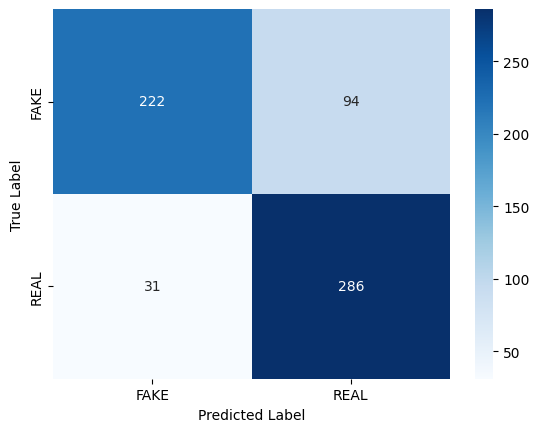

In [ ]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd



data = pd.read_csv('news.csv')

train, remaining_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42, stratify=remaining_data['label'])


le = LabelEncoder()
train_labels = le.fit_transform(train.label)
test_labels = le.transform(test.label)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

tokenizer.pad_token = tokenizer.eos_token

train_encodings = tokenizer(train.title.to_list(), truncation=True, padding=True)
test_encodings = tokenizer(test.title.to_list(), truncation=True, padding=True)

NameError: name 'test' is not defined

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

data = pd.read_csv('news.csv')


train, remaining_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42, stratify=remaining_data['label'])


le = LabelEncoder()
train_labels = le.fit_transform(train.label)
test_labels = le.transform(test_data.label)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

tokenizer.pad_token = tokenizer.eos_token

train['text_combined'] = train['title'] + ' ' + train['text']
test_data['text_combined'] = test_data['title'] + ' ' + test_data['text']

train_encodings = tokenizer(train['text_combined'].to_list(), truncation=True, padding=True)
test_encodings = tokenizer(test_data['text_combined'].to_list(), truncation=True, padding=True)

train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']), torch.tensor(train_labels))
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']), torch.tensor(test_labels))

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=2)
model.config.pad_token_id = tokenizer.eos_token_id
device = torch.device('cuda')
model.to(device)

optim = AdamW(model.parameters(), lr=5e-5)
total_train_loss = 0;
for epoch in range(10):
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        optim.zero_grad()
        input_ids = batch[0].to(device)
        labels = batch[1].to(device)
        outputs = model(input_ids, labels=labels)
        loss = outputs[0]
        loss.backward()
        optim.step()
        total_train_loss += loss.item()
    avg_train_loss = total_train_loss / len(train_loader)
    print(f'Epoch: {epoch+1}, Loss:  {avg_train_loss}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Epoch: 1, Loss:  0.06888428634005593
Epoch: 2, Loss:  0.0756452208305926
Epoch: 3, Loss:  0.0853790586500251
Epoch: 4, Loss:  0.0955375326860342
Epoch: 5, Loss:  0.10474034269752648
Epoch: 6, Loss:  0.11487611191005906
Epoch: 7, Loss:  0.1171602312410017
Epoch: 8, Loss:  0.11720029202614433


KeyboardInterrupt: 

In [ ]:
torch.cuda.empty_cache()

In [ ]:
val_labels = le.transform(val_data.label)
val_encodings = tokenizer(val_data.title.to_list(), truncation=True, padding=True)
val_dataset = TensorDataset(torch.tensor(val_encodings['input_ids']), torch.tensor(val_labels))
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

model.eval()
y_true = []
y_pred = []

for batch in val_loader:
    input_ids = batch[0].cuda()
    labels = batch[1].cuda()
    outputs = model(input_ids)
    _, predicted = torch.max(outputs[0], 1)
    y_true.extend(labels.tolist())
    y_pred.extend(predicted.tolist())

print(classification_report(y_true, y_pred, target_names=['fake', 'real']))


              precision    recall  f1-score   support

        fake       0.88      0.70      0.78       316
        real       0.75      0.90      0.82       317

    accuracy                           0.80       633
   macro avg       0.82      0.80      0.80       633
weighted avg       0.81      0.80      0.80       633



In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
embeddings = []
model.config.output_hidden_states = True

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        outputs = model(input_ids)
        last_hidden_states = outputs.hidden_states[-1]
        embeddings.extend(last_hidden_states.mean(dim=1).cpu().numpy())


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
embeddings_reduced = tsne.fit_transform(embeddings)

df = pd.DataFrame({'x': embeddings_reduced[:, 0], 'y': embeddings_reduced[:, 1], 'label': true_labels})

plt.figure(figsize=(10, 10))
for label in df.label.unique():
    plt.scatter(df[df.label == label].x, df[df.label == label].y, label=label, alpha=0.7)
plt.legend()
plt.show()

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
import numpy as np

if embeddings:
    embeddings = np.stack(embeddings)
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_reduced = tsne.fit_transform(embeddings)
else:
    print("Lista embeddings jest pusta.")


NameError: name 'embeddings' is not defined

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
embeddings_reduced = tsne.fit_transform(embeddings)

df = pd.DataFrame({'x': embeddings_reduced[:, 0], 'y': embeddings_reduced[:, 1], 'label': true_labels})

plt.figure(figsize=(10, 10))
for label in df.label.unique():
    plt.scatter(df[df.label == label].x, df[df.label == label].y, label=label, alpha=0.7)
plt.legend()
plt.show()

NameError: name 'true_labels' is not defined

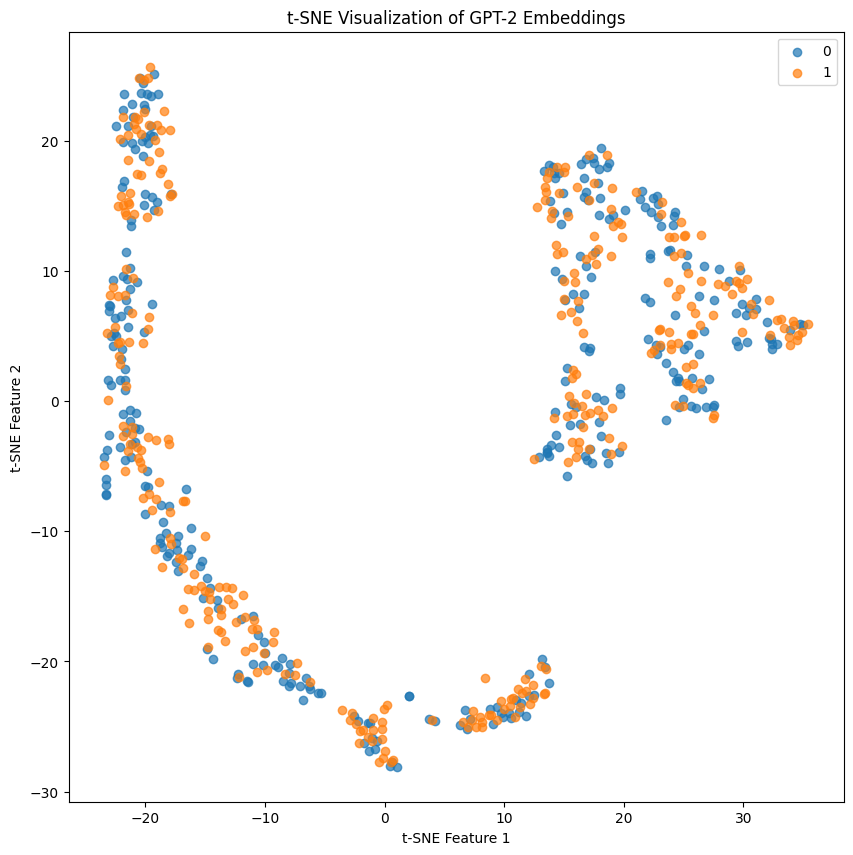

In [ ]:
true_labels = []
predictions = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        labels = batch[1]
        outputs = model(input_ids)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

df = pd.DataFrame({
    'x': embeddings_reduced[:, 0],
    'y': embeddings_reduced[:, 1],
    'label': true_labels
})

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for label_class in np.unique(true_labels):
    plt.scatter(df[df.label == label_class].x, df[df.label == label_class].y, label=label_class, alpha=0.7)
plt.legend()
plt.title('t-SNE Visualization of GPT-2 Embeddings')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()


In [ ]:
!pip uninstall umap
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=c90db755c69752df5c25300398e0502b1552d74f1d8c235701fcb2572476cb4e
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


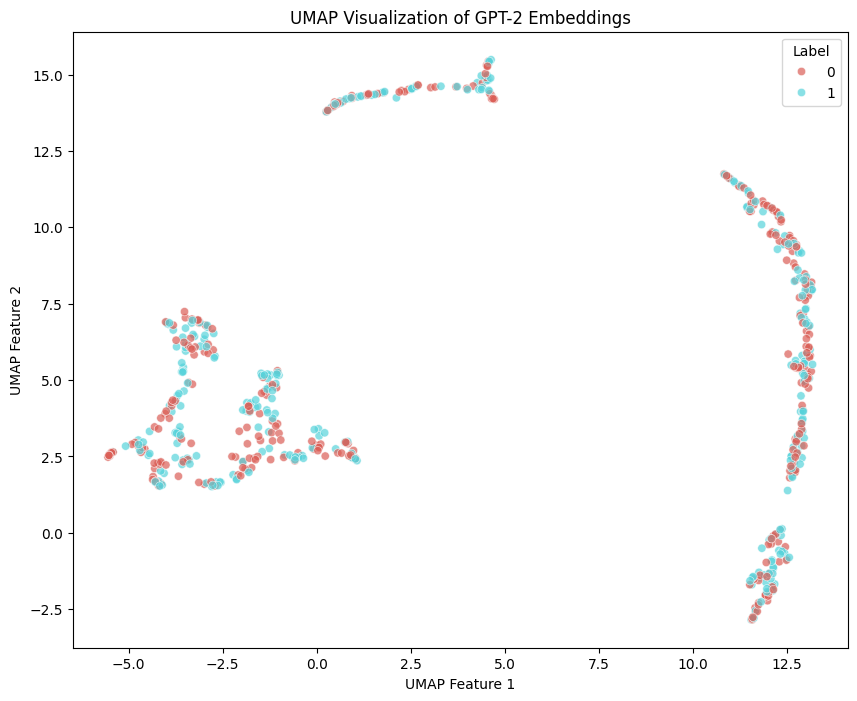

In [ ]:
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

embeddings = np.stack(embeddings)

umap_model = UMAP(n_neighbors=15, n_components=2, metric='euclidean', random_state=42)
embeddings_umap = umap_model.fit_transform(embeddings)

umap_data = pd.DataFrame({'UMAP Feature 1': embeddings_umap[:, 0], 'UMAP Feature 2': embeddings_umap[:, 1], 'Label': true_labels})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='UMAP Feature 1', y='UMAP Feature 2',
    hue='Label',
    palette=sns.color_palette("hls", 2),
    data=umap_data,
    legend="full",
    alpha=0.7
)
plt.title('UMAP Visualization of GPT-2 Embeddings')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
!cp -r "/content/drive/MyDrive/modele_gpt_bert" "/content/modele"


In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

data = pd.read_csv('news.csv')


train, remaining_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42, stratify=remaining_data['label'])


le = LabelEncoder()
train_labels = le.fit_transform(train.label)
test_labels = le.transform(test_data.label)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

tokenizer.pad_token = tokenizer.eos_token

train['text_combined'] = train['title'] + ' ' + train['text']
test_data['text_combined'] = test_data['title'] + ' ' + test_data['text']

train_encodings = tokenizer(train['text_combined'].to_list(), truncation=True, padding=True)
test_encodings = tokenizer(test_data['text_combined'].to_list(), truncation=True, padding=True)

train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']), torch.tensor(train_labels))
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']), torch.tensor(test_labels))

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=2)
model.config.pad_token_id = tokenizer.eos_token_id
device = torch.device('cuda')
model.to(device)

optim = AdamW(model.parameters(), lr=5e-5)
total_train_loss = 0;

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import os

model_path = '/content/modele/model.pkl'
if os.path.exists(model_path):
    print("Plik modelu istnieje.")
else:
    print("Plik modelu NIE istnieje. Sprawdź ścieżkę.")


Plik modelu istnieje.


In [ ]:
import pickle

#pickle.dump(classifier_model, open('bert.pkl', 'wb'))
model = pickle.load(open('modele/model.pkl', 'rb'))

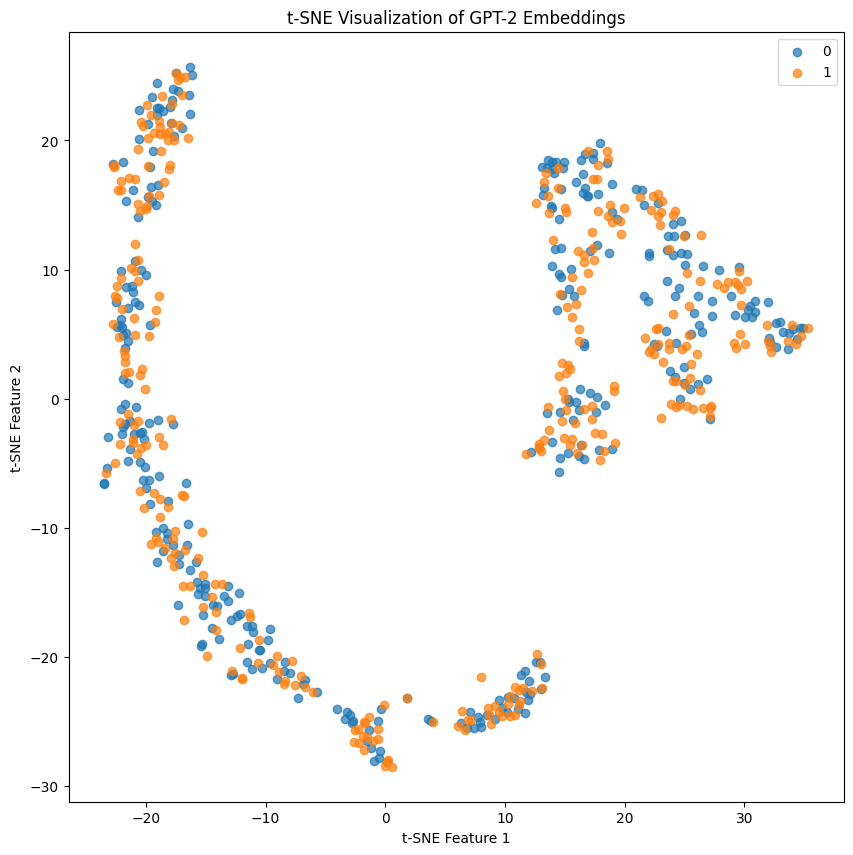

In [ ]:
true_labels = []
predictions = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        labels = batch[1]
        outputs = model(input_ids)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

df = pd.DataFrame({
    'x': embeddings_reduced[:, 0],
    'y': embeddings_reduced[:, 1],
    'label': true_labels
})

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for label_class in np.unique(true_labels):
    plt.scatter(df[df.label == label_class].x, df[df.label == label_class].y, label=label_class, alpha=0.7)
plt.legend()
plt.title('t-SNE Visualization of GPT-2 Embeddings')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()


In [ ]:
import umap.umap_ as UMAP
import matplotlib.pyplot as plt
import seaborn as sns

embeddings = np.stack(embeddings)

umap_model = UMAP(n_neighbors=15, n_components=2, metric='euclidean', random_state=42)
embeddings_umap = umap_model.fit_transform(embeddings)

umap_data = pd.DataFrame({'UMAP Feature 1': embeddings_umap[:, 0], 'UMAP Feature 2': embeddings_umap[:, 1], 'Label': true_labels})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='UMAP Feature 1', y='UMAP Feature 2',
    hue='Label',
    palette=sns.color_palette("hls", 2),
    data=umap_data,
    legend="full",
    alpha=0.7
)
plt.title('UMAP Visualization of GPT-2 Embeddings')
plt.show()


TypeError: 'module' object is not callable

In [ ]:
def get_activation(name):
    def hook(model, input, output):
        print("Struktura output:", output)

        if isinstance(output, tuple):
            activation[name] = output[0].detach()
        else:
            activation[name] = output.detach()
    return hook

layer_number = 5
hook = model.transformer.h[layer_number].register_forward_hook(get_activation(f'layer_{layer_number}'))

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        labels = batch[1].to(device)
        outputs = model(input_ids, labels=labels)

hook.remove()


AttributeError: 'tuple' object has no attribute 'detach'

In [ ]:
model.config.output_hidden_states = True

activations = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        outputs = model(input_ids)
        activations.append(outputs.hidden_states[5].cpu().numpy())



NameError: name 'plt' is not defined

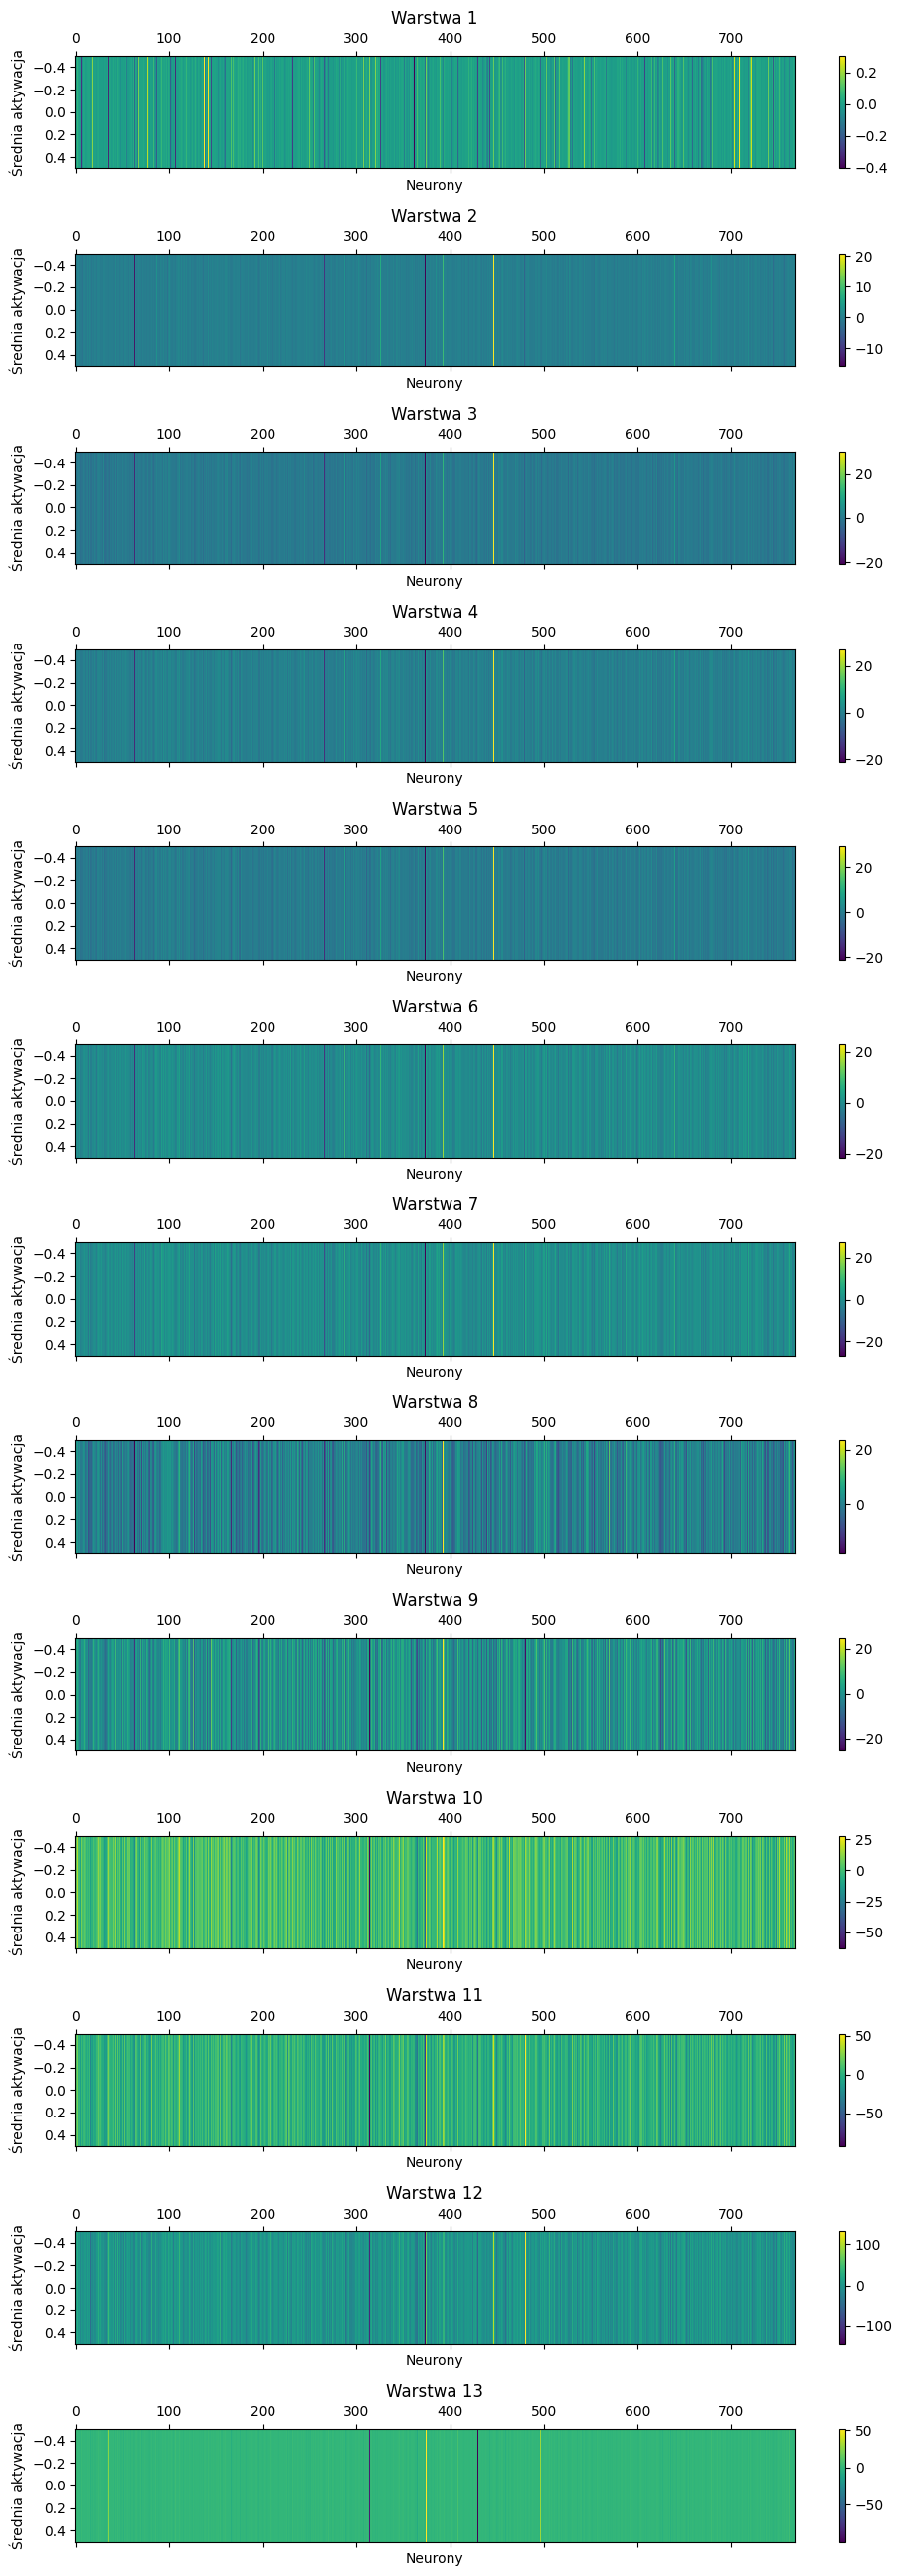

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model.config.output_hidden_states = True

all_layers_activations = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        outputs = model(input_ids)
        all_layers_activations.append(outputs.hidden_states)

num_layers = len(all_layers_activations[0])
fig, axes = plt.subplots(num_layers, 1, figsize=(10, num_layers * 2))

for i, layer_activations in enumerate(all_layers_activations[0]):
    sample_activation = layer_activations[0].cpu().numpy()
    mean_activation = sample_activation.mean(axis=0)
    ax = axes[i]
    cax = ax.matshow(mean_activation.reshape((1, -1)), cmap='viridis', aspect='auto')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'Warstwa {i+1}')
    ax.set_xlabel('Neurony')
    ax.set_ylabel('Średnia aktywacja')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

umap_data = pd.DataFrame({
    'UMAP Feature 1': embeddings_reduced[:, 0],
    'UMAP Feature 2': embeddings_reduced[:, 1],
    'text': test_data['text_combined'],
    'label': test_data['label']
})

fig = px.scatter(umap_data, x='UMAP Feature 1', y='UMAP Feature 2', color='label', hover_data=['text'])
fig.show()
